In [39]:
import pandas as pd

# Load the datasets
consumption_file_path = 'data (25).csv'
service_file_path = 'data (27).csv'
consumption_data = pd.read_csv(consumption_file_path)
service_data = pd.read_csv(service_file_path)

# Combined mapping dictionary for consumption and service data
combined_mapping = {
    'MOH 747A_Male Condoms': 'Male Condoms',
    'MOH 747A_Male Condoms Dispensed': 'Male Condoms',
    'MOH 747A_Female Condoms': 'Female Condoms',
    'MOH 747A_Female Condoms Dispensed': 'Female Condoms',
    'MOH 747A_Emergency Contraceptive pills': 'EC Pills',
    'MOH 747A_Emergency Contraceptive pills Dispensed': 'EC Pills',
    'MOH 747A_Combined Oral contraceptive Pills': 'COCs',
    'MOH 747A_Combined Oral contraceptive Pills Dispensed': 'COCs',
    'MOH 747A_Progestin only pills': 'POPs',
    'MOH 747A_Progestin only pills Dispensed': 'POPs',
    'MOH 747A_Cycle Beads': 'Cycle Beads',
    'MOH 747A_Cycle Beads Dispensed': 'Cycle Beads',
    'MOH 747A_DMPA-IM': 'DMPA-IM',
    'MOH 747A_DMPA-IM Dispensed': 'DMPA-IM',
    'MOH 747A_DMPA-SC': 'DMPA-SC',
    'MOH 747A_DMPA-SC Dispensed': 'DMPA-SC',
    'MOH 747A_Implants (1-Rod) – ENG 68mg': 'Implanon',
    'MOH 747A_Implants (1-Rod) – ENG 68mg Dispensed': 'Implanon',
    'MOH 747A_Implants (2-Rod) - LNG 75mg (3 years)': 'Levoplant',
    'MOH 747A_Implants (2-Rod) - LNG 75mg (3 years) Dispensed': 'Levoplant',
    'MOH 747A_Implant (2-Rod) – LNG 75mg (5 years)': 'Jadelle',
    'MOH 747A_Implant (2-Rod) – LNG 75mg (5 years) Dispensed': 'Jadelle',
    'MOH 747A_Hormonal IUCD': 'Hormonal IUCD',
    'MOH 747A_Hormonal IUCD Dispensed': 'Hormonal IUCD',
    'MOH 747A_Non-Hormonal IUCD': 'Non-Hormonal IUCD',
    'MOH 747A_Non-Hormonal IUCD Dispensed': 'Non-Hormonal IUCD',
    'MOH 711 Client receiving Male condoms': 'Male Condoms',
    'MOH 711 Clients receiving Female Condoms': 'Female Condoms',
    'MOH 711 Emergency contraceptive pill': 'EC Pills',
    'MOH 711 Pills Combined oral contraceptive': 'COCs',
    'MOH 711 Pills progestin only': 'POPs',
    'MOH 711 Rev 2020_Clients given cycle beads': 'Cycle Beads',
    'MOH 711 Rev 2020_FP Injections DMPA- IM': 'DMPA-IM',
    'MOH 711 Rev 2020_FP Injections DMPA- SC': 'DMPA-SC',
    'MOH 711 Rev 2020_Implants insertion 1 Rod': 'Implanon',
    'MOH 711 Rev 2020_Implants insertion 2 Rod': '2 Rod',
    'MOH 711 Rev 2020_IUCD Insertion Hormonal': 'Hormonal IUCD',
    'MOH 711 Rev 2020_IUCD Insertion Non Hormonal': 'Non-Hormonal IUCD'
}

# Apply the combined mapping to the columns
consumption_data.rename(columns=combined_mapping, inplace=True)
service_data.rename(columns=combined_mapping, inplace=True)

# Debug print: Check columns after renaming
print("Consumption Data Columns After Renaming:")
print(consumption_data.columns)

print("\nService Data Columns After Renaming:")
print(service_data.columns)

# Add a column to distinguish between consumption and service
consumption_data['Type'] = 'Consumption'
service_data['Type'] = 'Service'

# Identify common columns
common_columns = list(set(consumption_data.columns) & set(service_data.columns))
retain_columns = [
    'periodid', 'periodname', 'periodcode', 'perioddescription',
    'organisationunitid', 'organisationunitname', 'organisationunitcode',
    'organisationunitdescription', 'Cycle Beads', 'DMPA-IM', 'DMPA-SC',
    'Hormonal IUCD', 'Non-Hormonal IUCD', 'Implanon', '2 Rod',
    'Male Condoms', 'Female Condoms', 'EC Pills', 'COCs', 'POPs', 'Type'
]

# Filter the retain_columns to include only those present in common_columns
retain_columns = [col for col in retain_columns if col in common_columns]

# Filter columns in both datasets
consumption_data_filtered = consumption_data[retain_columns]
service_data_filtered = service_data[retain_columns]

# Combine the filtered datasets for further analysis
combined_data = pd.concat([consumption_data_filtered, service_data_filtered], ignore_index=True)

# Print combined data columns
print("\nCombined Data Columns:")
print(combined_data.columns)

# Save the combined data to a new CSV file
combined_data.to_csv('combined_data.csv', index=False)


Consumption Data Columns After Renaming:
Index(['periodid', 'periodname', 'periodcode', 'perioddescription',
       'organisationunitid', 'organisationunitname', 'organisationunitcode',
       'organisationunitdescription', 'Cycle Beads', 'DMPA-IM', 'DMPA-SC',
       'EC Pills', 'Female Condoms', 'Hormonal IUCD', 'Jadelle', 'Implanon',
       'Levoplant', 'Male Condoms', 'Non-Hormonal IUCD',
       'MOH 747A_Others Dispensed', 'POPs', 'COCs'],
      dtype='object')

Service Data Columns After Renaming:
Index(['periodid', 'periodname', 'periodcode', 'perioddescription',
       'organisationunitid', 'organisationunitname', 'organisationunitcode',
       'organisationunitdescription', 'Cycle Beads', 'DMPA-IM', 'DMPA-SC',
       'Hormonal IUCD', 'Non-Hormonal IUCD', 'Implanon', '2 Rod',
       'Male Condoms', 'Female Condoms', 'EC Pills', 'COCs', 'POPs'],
      dtype='object')

Combined Data Columns:
Index(['periodid', 'periodname', 'periodcode', 'perioddescription',
       'organisationun

C:\Users\Grace\AppData\Local\Temp\ipykernel_12452\2589971869.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_data['periodname'] = pd.to_datetime(combined_data['periodname'], errors='coerce')
C:\Users\Grace\AppData\Local\Temp\ipykernel_12452\2589971869.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = combined_data.resample('M').sum()
c:\Users\Grace\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Grace\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Grace\anaconda3\L

  periodname  periodid  periodcode  perioddescription  \
0 2020-01-31   9494047     9494047                0.0   
1 2020-02-29   9494094     9494094                0.0   
2 2020-03-31   9494141     9494141                0.0   
3 2020-04-30   9494188     9494188                0.0   
4 2020-05-31   9494235     9494235                0.0   

                                  organisationunitid  \
0  vvOK1BxTbetHMNARUV2CW4KGHhQ5GLd4kTvf1zgVZ0K4Mq...   
1  vvOK1BxTbetHMNARUV2CW4KGHhQ5GLd4kTvf1zgVZ0K4Mq...   
2  vvOK1BxTbetHMNARUV2CW4KGHhQ5GLd4kTvf1zgVZ0K4Mq...   
3  vvOK1BxTbetHMNARUV2CW4KGHhQ5GLd4kTvf1zgVZ0K4Mq...   
4  vvOK1BxTbetHMNARUV2CW4KGHhQ5GLd4kTvf1zgVZ0K4Mq...   

                                organisationunitname  \
0  Baringo CountyBomet CountyBungoma CountyBusia ...   
1  Baringo CountyBomet CountyBungoma CountyBusia ...   
2  Baringo CountyBomet CountyBungoma CountyBusia ...   
3  Baringo CountyBomet CountyBungoma CountyBusia ...   
4  Baringo CountyBomet CountyBungoma Cou

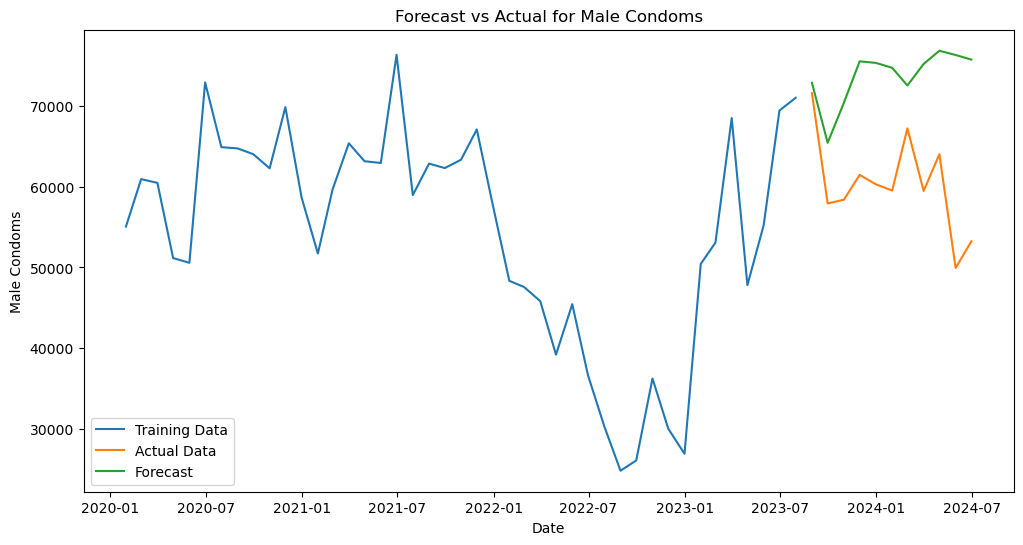

In [73]:
import pandas as pd

# Load the combined data
combined_data = pd.read_csv('combined_data.csv')

# Convert 'periodname' to datetime if it's not already
combined_data['periodname'] = pd.to_datetime(combined_data['periodname'], errors='coerce')

# Drop rows with NaN values in 'periodname'
combined_data.dropna(subset=['periodname'], inplace=True)

# Aggregate data to the monthly level
combined_data.set_index('periodname', inplace=True)
monthly_data = combined_data.resample('M').sum()

# Reset index to make 'periodname' a column again
monthly_data.reset_index(inplace=True)

# Debug print: Check the first few rows of the aggregated data
print(monthly_data.head())

# Save the preprocessed data to a new CSV file
monthly_data.to_csv('preprocessed_data.csv', index=False)
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the preprocessed data
monthly_data = pd.read_csv('preprocessed_data.csv', parse_dates=['periodname'])

# Set 'periodname' as the index
monthly_data.set_index('periodname', inplace=True)

# Select a column for forecasting (e.g., 'Male Condoms')
data_column = 'Male Condoms'
series = monthly_data[data_column].dropna()

# Split the data into training and test sets
train_size = int(len(series) * 0.8)
train, test = series[:train_size], series[train_size:]

# Fit the ARIMA model
model = ARIMA(train, order=(5,1,0))  # Adjust order as necessary
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test.index, test, label='Actual Data')
plt.plot(test.index, forecast, label='Forecast')
plt.xlabel('Date')
plt.ylabel(data_column)
plt.title(f'Forecast vs Actual for {data_column}')
plt.legend()
plt.show()
import streamlit as st
import pandas as pd
import numpy as np
from plotly import graph_objs as go
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the data
data_file_path = 'combined_data.csv'
combined_data = pd.read_csv(data_file_path)

# Convert 'periodname' to datetime
combined_data['periodname'] = pd.to_datetime(combined_data['periodname'], format='%b-%y', errors='coerce')

# Set page title
st.title("Family Planning Commodities Analysis")

# Filters for selecting product, organization, and data type
products = [
    'Male Condoms', 'Female Condoms', 'EC Pills', 'COCs', 'POPs',
    'Cycle Beads', 'DMPA-IM', 'DMPA-SC', 'Implanon', '2 Rod',
    'Hormonal IUCD', 'Non-Hormonal IUCD', 'Levoplant', 'Jadelle'
]

organizations = combined_data['organisationunitname'].unique()
data_types = ['Consumption', 'Service', 'Both']

selected_product = st.selectbox("Select Product", products)
selected_organization = st.selectbox("Select Organization", organizations)
selected_data_type = st.selectbox("Select Data Type", data_types)

# Filter data based on selections
if selected_data_type == 'Consumption':
    filtered_data = combined_data[(combined_data[selected_product].notna()) & (combined_data['Type'] == 'Consumption')]
elif selected_data_type == 'Service':
    filtered_data = combined_data[(combined_data[selected_product].notna()) & (combined_data['Type'] == 'Service')]
else:
    filtered_data = combined_data[combined_data[selected_product].notna()]

filtered_data = filtered_data[filtered_data['organisationunitname'] == selected_organization]

# Interactive plot to show data labels
def plot_interactive(data, title):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=data['periodname'], y=data[selected_product], mode='lines+markers', name=title, text=data[selected_product], hoverinfo='text'))

    fig.update_layout(
        title=title,
        xaxis_title='Period',
        yaxis_title='Quantity',
        hovermode='closest'
    )
    return fig

# Buttons for showing trends and forecasts
if st.button("Show Trend"):
    st.subheader(f"Trend for {selected_product} in {selected_organization}")
    if selected_data_type == 'Both':
        consumption_data = filtered_data[filtered_data['Type'] == 'Consumption']
        service_data = filtered_data[filtered_data['Type'] == 'Service']
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=consumption_data['periodname'], y=consumption_data[selected_product], mode='lines+markers', name='Consumption', text=consumption_data[selected_product], hoverinfo='text'))
        fig.add_trace(go.Scatter(x=service_data['periodname'], y=service_data[selected_product], mode='lines+markers', name='Service', text=service_data[selected_product], hoverinfo='text'))
        fig.update_layout(title=f"Trend for {selected_product} in {selected_organization}", xaxis_title='Period', yaxis_title='Quantity', hovermode='closest')
    else:
        fig = plot_interactive(filtered_data, f"Trend for {selected_product} in {selected_organization}")

    st.plotly_chart(fig)

if st.button("Show Forecast"):
    st.subheader(f"Forecast for {selected_product} in {selected_organization}")
    model = ExponentialSmoothing(filtered_data[selected_product], seasonal='add', seasonal_periods=12).fit()
    forecast = model.forecast(steps=12)
    forecast_index = pd.date_range(start=filtered_data['periodname'].iloc[-1], periods=12, freq='M')

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=filtered_data['periodname'], y=filtered_data[selected_product], mode='lines+markers', name='Actual', text=filtered_data[selected_product], hoverinfo='text'))
    fig.add_trace(go.Scatter(x=forecast_index, y=forecast, mode='lines+markers', name='Forecast', text=forecast, hoverinfo='text'))

    fig.update_layout(title=f"Forecast for {selected_product} in {selected_organization}", xaxis_title='Period', yaxis_title='Quantity', hovermode='closest')
    st.plotly_chart(fig)

    # Display forecast table
    forecast_table = pd.DataFrame({'Date': forecast_index, 'Forecasted Quantity': forecast})
    st.subheader("Forecast Table")
    st.table(forecast_table)

